In [1]:
from SUS.MCMC import metropolis_hasting
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from SUS.Model_eval import F1_score
from SUS.Model_eval import cross_validation

# Single layer Perceptron test run,
1. Initialize the following parameters:<br>1. weights: The weights are the parameters that the model learns.<br>2. Learning Rate:learning rate is used to control the error’s impact on the updated weights. We set it to 1.<br>3. Set, $a=1$ where $a$ is the no of count for model Update its weights aka. mistake condition <br> and  $b = 1$, where $b$ is the no of count for model doesnot Update its weights.<br>4. Set $i = 0$
2. Itteration,<br>1. Picking a feature X stocastically from the traning sets, <br>2. Calculating the perceptron loss$$loss = y * w^T x$$<br>3. If, $loss<0 $ <br>We update the current weights, $w_{i+1}= w_i+y_i*x_i $ and incrementing $a = a+1$<br>Otherwise, stick to the older weights and incrementing $b = b+1$.
3. When $b=10*a$ i.e model weights are optimized enough that model does not update its weights (loss always +ve). Append the weights value.

In [2]:
#given data sets
attributes = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', header=None, names=attributes)
#preprocessing the data sets
def preprocess_df(df):
    
    df=df.iloc[np.random.permutation(len(df))]
    
    if (df.isna().sum().sum()==0):
        print ('Data frame does not contain any missing values')   #conditionl statement triggered if data contain any missing value
    
    else:
        df=df.fillna(0)                     #filling the missing values with 0 lable
    
    return df

df = preprocess_df(data)

Data frame does not contain any missing values


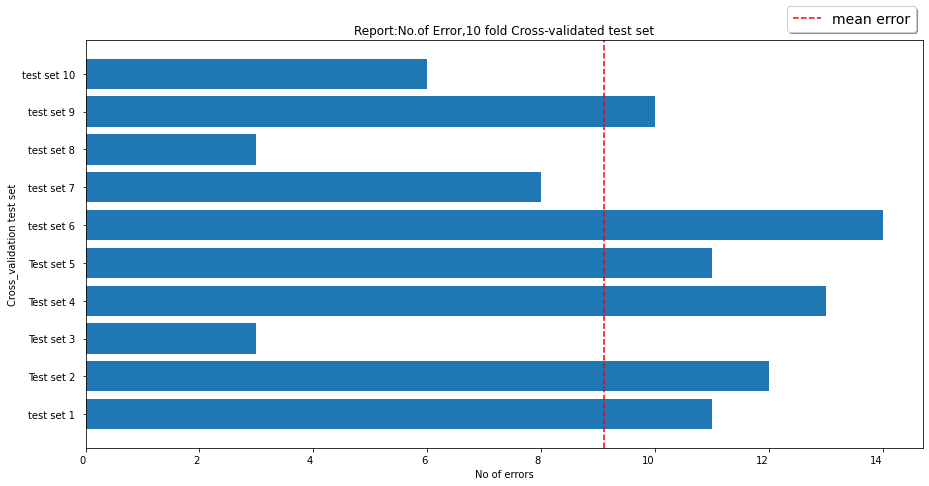

In [3]:
#making the 10 fold cross validation test train sets of our datasets
z = cross_validation(df,k_fold = 10)

#grouping error for all crossvalidation training sets 
report = {'test set 1 ':z[0][4],
        'Test set 2 ':z[1][4],
        'Test set 3 ':z[2][4],
        'Test set 4 ':z[3][4],
        'Test set 5 ':z[4][4],
         'test set 6 ':z[5][4],
         'test set 7 ':z[6][4],
         'test set 8 ':z[7][4],
         'test set 9 ':z[8][4],
         'test set 10 ':z[9][4]}
group_data = list(report.values())
group_names = list(report.keys())
group_mean = np.mean(group_data)      #mean error of the model
group_max = np.max(group_data)       #maximum error of the cv set      

fig, ax = plt.subplots(figsize=(15, 7.5))
ax.barh(group_names, group_data)
labels = ax.get_xticklabels()
plt.setp(labels, rotation=0, horizontalalignment='right')

ax.axvline(group_mean, label="mean error", ls='--', color='r')
plt.legend( bbox_to_anchor=[1,1.1],ncol=3, shadow=True, fancybox=True,fontsize=14)
ax.set(xlabel='No of errors', ylabel='Cross_validation test set', title='Report:No.of Error,10 fold Cross-validated test set')
plt.show()


In [4]:
#grouping all the crossvalidation data sets f1 score
f1_report = {'Test set 1 ':z[0][3],
             'Test set 2 ':z[1][3],
             'Test set 3 ':z[2][3],
             'Test set 4 ':z[3][3],
             'Test set 5 ':z[4][3],
             'Test set 6 ':z[5][3],
             'Test set 7 ':z[6][3],
             'Test set 8 ':z[7][3],
             'Test set 9 ':z[8][3],
             'Test set 10 ':z[9][3]}

x = list(f1_report.values())
for i in range (len(x)):          #finding the best performing crossvalidation sets aka best f1 score card
    if x[i] == np.amax(x):
        a = i

#printing the report
print ("Best peforming K-fold_Cross_validition testing set: "+" Test set No. "+str(a+1))
print("Accuracy for the Test set "+str(a+1)+" is: "+str(z[a][0]*100)+" %")
print("Precision for the Test set "+str(a+1)+" is: "+str(z[a][1]*100)+" %")
print("Recall for the Test set "+str(a+1)+" is: "+str(z[a][2]*100)+" %")
print("F1_score for the Test set "+str(a+1)+" is: "+str(z[a][3]))

Best peforming K-fold_Cross_validition testing set:  Test set No. 3
Accuracy for the Test set 3 is: 97.8102189781022 %
Precision for the Test set 3 is: 100.0 %
Recall for the Test set 3 is: 94.64285714285714 %
F1_score for the Test set 3 is: 0.9724770642201834


# MCMC Sampeling:
Given data sample, $$x_n \sim N(\mu,\sigma^2)~~~~~iid$$
Steps:
1. Generate 50 normally distributed sample data, having $\mu=10~~and~~\sigma=5$, i.e
 $$~~~x_n = x_1+x_2+\cdots+x_{50}$$

2. The likelihood function for the data is based on the Normal distribution, i.e.,$$f(x_1,x_2,\dots x_n|\mu)=\prod\limits_{i=1}^n\displaystyle\frac{1}{\sqrt{2\pi\sigma}}exp(-{\displaystyle\frac{(x_i - \mu)^2}{2\sigma^2})
    =(\displaystyle\frac{1}{\sqrt{2\pi\sigma}})^n  
}exp (-\displaystyle\frac{\sum\limits_{i=1}^n(x_i - \mu)^2}{2\sigma^2}) 
    = (2\pi\sigma^2)^{-\displaystyle\frac{n}{2}} exp (-\displaystyle\frac{1}{2\sigma^2}\sum\limits_{i=1}^n(x_i - \mu)^2)$$
    
    So, log likelihood, $$L = \ln (f(x_1,x_2,\dots x_n|\mu)) = \displaystyle\frac{-n}{2}\ln(2\pi) - n\ln(\sigma) - \sum\limits_{i=1}^n\displaystyle\frac{(x_i- \mu)^2}{2\sigma^2}$$
    Now, to get the pdf likelihood, we have to calculate the log_likelihood and maximize it wrt $\mu$ and $\sigma$ to obtain the $\mu_{MLE}$ and $\sigma_{MLE}$.
    $$\displaystyle\frac{\partial{L}}{\partial{\mu}} = 0~~~and~~~\displaystyle\frac{\partial{L}}{\partial{\sigma}}=0$$
    
    After doing the above steps we get,$$\mu_{MLE}= \displaystyle\frac{\sum\limits_{i=1}^nx_i}{n} ~~~~and~~~~ \sigma_{MLE}^2=\displaystyle\frac{\sum\limits_{i=1}^n(x_i - \mu_{MLE})^2}{n}$$
    
    Now, as we know for gaussian prior the likelihod will be gaussian. So by plug in the  $\mu_{MLE}$ and $\sigma_{MLE}$ into the gaussian function we get the likelihood pdf.
    
3. It is assumed that the prior is normally distributed with $\mu_0 = 25~~and~~\sigma_0 = 5$;
   
   Now we can therefore approximate our prior knowledge as:
   $$P(\mu)\sim N(\mu_0,\sigma_0 ^2)$$
   
4. We now wish to combine this prior density with the information in the data to derive the posterior distribution. This combination is again carried out by a version of Bayes Theorem.

    $$P(\mu|x_1,x_2,\dots x_n) = \displaystyle\frac{P(\mu)P(x_1,x_2,\dots x_n|\mu)}{P(x_1,x_2,\dots x_n)}
        \propto P(\mu)P(x_1,x_2,\dots x_n|\mu)$$
    After solving we get,
    $$\sigma_n^2 = (\displaystyle\frac{1}{\sigma_0^2} + \displaystyle\frac{n}{\sigma^2})^{-1}~~and~~\mu_n = \sigma_n^2 (\displaystyle\frac{\mu_0}{\sigma_o^2} + \displaystyle\frac{\sum\limits_{i=1}^n x_i}{\sigma^2})$$
5. So the Bayesian posterior probability is,
    $$P(\mu|x_1,x_2,\dots x_n) \sim N (\mu_n, \sigma_n^2)$$

Mean of the posterior distribution = 9.996014672137923
Std. of the posterior distribution = 4.945428505698873


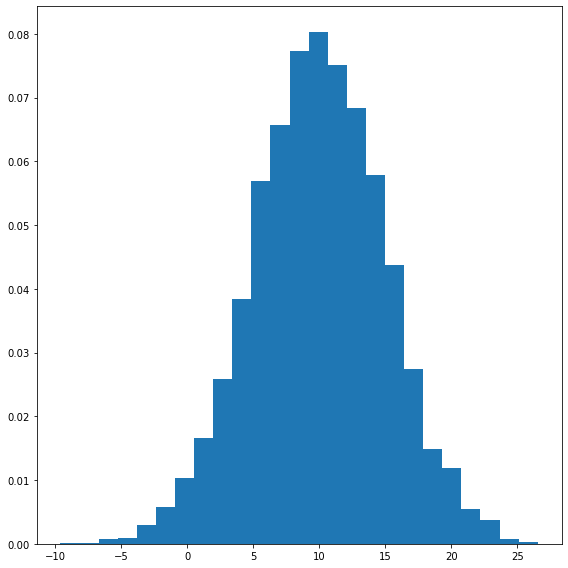

In [5]:
# generating dataset having normal distribution having mean = 10 and sd = 5
m = np.random.normal(10,5,50)
x= np.sort(m)

mu, sd = 10,5                  #mean and std. of the data
mu_,sd_ = 25,5                    #mean and std. of the prior

mu, sd = 10,5                  #mean and std. of the data
mu_,sd_ = 25,5                    #mean and std. of the prior
X = metropolis_hasting(x,5,mu,sd,mu_,sd_) #given dataset and proposal width = 5

print("Mean of the posterior distribution = " + str(np.mean(X[0])))
print("Std. of the posterior distribution = " + str(np.std(X[0])))

fig, ax = plt.subplots(sharey=True, tight_layout=True,figsize=(8,8))
ax.hist(X[0], bins=25, density= True)
# ax.plot(y,post,label="Posterior",linewidth=3,c='g',alpha=0.5)
plt.show()

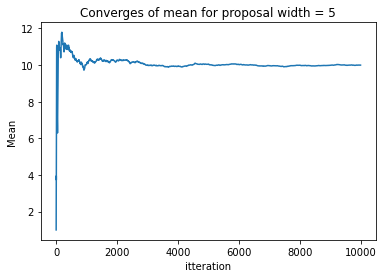

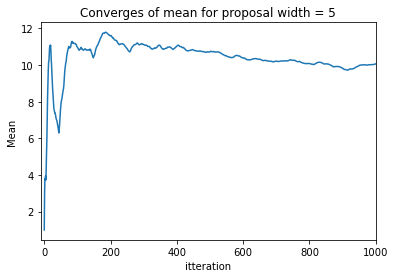

model efficiency = 70.94%


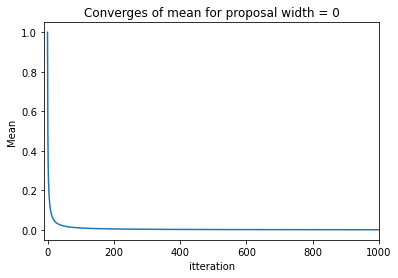

model efficiency = 99.99%


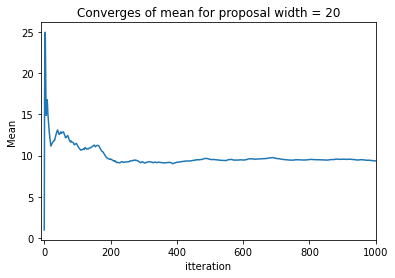

model efficiency = 29.47%


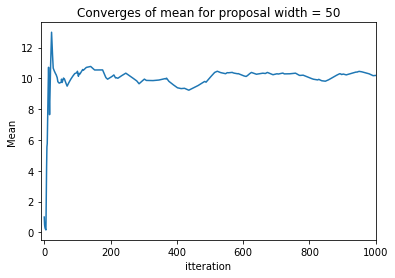

model efficiency = 12.19%


In [6]:
#convergence of the mean
x = []
m = []
for i in range (len(X[0])):    
    x.append(X[0][i])
    m.append(np.mean(x))


#mean of the sample vs no_iter
plt.plot(m)
plt.xlabel("itteration")
plt.ylabel("Mean")
plt.title("Converges of mean for proposal width = 5")
plt.show()

#given dataset and proposal width = 5
plt.plot(m)
plt.xlim (-10,1000)     #checking the convergence point by limiting the x_axis
plt.xlabel("itteration")
plt.ylabel("Mean")
plt.title("Converges of mean for proposal width = 5")
plt.show()
print ('model efficiency = '+ str(np.round(X[1]*100/len(X[0]),2))+'%')


#given dataset and proposal width = 0
X = metropolis_hasting(x,0,mu,sd,mu_,sd_)
x = []
m = []
for i in range (len(X[0])):
    x.append(X[0][i])
    m.append(np.mean(x))

plt.plot(m)
plt.xlim (-10,1000)     #checking the convergence point by limiting the x_axis
plt.xlabel("itteration")
plt.ylabel("Mean")
plt.title("Converges of mean for proposal width = 0")
plt.show()
print ('model efficiency = '+ str(np.round(X[1]*100/len(X[0]),2))+'%')


#given dataset and proposal width = 20
X= metropolis_hasting(x,20,mu,sd,mu_,sd_)
x = []
m = []
for i in range (len(X[0])):
    x.append(X[0][i])
    m.append(np.mean(x))

plt.plot(m)
plt.xlim (-10,1000)     #checking the convergence point by limiting the x_axis
plt.xlabel("itteration")
plt.ylabel("Mean")
plt.title("Converges of mean for proposal width = 20")
plt.show()
print ('model efficiency = '+ str(np.round(X[1]*100/len(X[0]),2))+'%')


#given dataset and proposal width = 50
X= metropolis_hasting(x,50,mu,sd,mu_,sd_)
x = []
m = []
for i in range (len(X[0])):
    x.append(X[0][i])
    m.append(np.mean(x))


plt.plot(m)
plt.xlim (-10,1000)     #checking the convergence point by limiting the x_axis
plt.xlabel("itteration")
plt.ylabel("Mean")
plt.title("Converges of mean for proposal width = 50")
plt.show()
print ('model efficiency = '+ str(np.round(X[1]*100/len(X[0]),2))+'%')